<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read and view csv
df = pd.read_csv("/Users/stephanienduaguba/Documents/DATA/Sacramento_transactions.csv")
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


This lab is the same as IOD_Lab 4.1.1ipynb, which contains a detailed analysis of the housing data. To avoid repetition and keep this notebook concise, I won't repeat the entire EDA process but only provide additional insights when relevant.

In [3]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [4]:
# Set 'zip' to string (object) as this is a categorical data
df['zip'] = df['zip'].astype(str)

In [5]:
# Convert sale_date to datetime datatype
df['sale_date'] = pd.to_datetime(df['sale_date'].str.replace('EDT', 'UTC+4'))

In [6]:
# Recheck datatypes
df.dtypes

street                                       object
city                                         object
zip                                          object
state                                        object
beds                                          int64
baths                                         int64
sq__ft                                        int64
type                                         object
sale_date    datetime64[ns, pytz.FixedOffset(-240)]
price                                         int64
latitude                                    float64
longitude                                   float64
dtype: object

In [7]:
# Extract the day from sale_date and save in a new column
df['day'] = df['sale_date'].dt.day
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879,21
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028,21
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839,21
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146,21
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768,21


In [8]:
# Unique categories for 'type'
df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [9]:
# Check Unkown data
df[df['type'] == 'Unkown']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day
757,6007 MARYBELLE LN,SHINGLE SPRINGS,95682,CA,0,0,0,Unkown,2008-05-16 00:00:00-04:00,275000,38.64347,-120.888183,16


In [10]:
# Check rows with zero 'sq__ft'
df[(df['sq__ft'] == 0)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,206000,38.631481,-121.501880,21
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,244500,38.626671,-121.525970,21
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,263500,38.553867,-121.219141,21
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,320000,38.528575,-121.228600,21
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,339500,38.602416,-121.542965,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,2008-05-15 00:00:00-04:00,188000,38.884170,-121.270222,15
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,2008-05-15 00:00:00-04:00,200100,38.569943,-121.527539,15
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,2008-05-15 00:00:00-04:00,220000,38.793152,-121.290025,15
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,2008-05-15 00:00:00-04:00,224000,38.631026,-121.501879,15


In [11]:
# Calculate the mean sq__ft for each type
type_mean_sqft = df.groupby('type')['sq__ft'].mean()

# Update the rows with zero sq__ft using the mean of their respective 'type'
df['sq__ft'] = df.apply(lambda row: type_mean_sqft[row['type']] if row['sq__ft'] == 0 else row['sq__ft'], axis=1)

In [12]:
df.iloc[[966, 973]]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,760.425926,Condo,2008-05-15 00:00:00-04:00,220000,38.793152,-121.290025,15
973,2181 WINTERHAVEN CIR,CAMERON PARK,95682,CA,3,2,1338.625954,Residential,2008-05-15 00:00:00-04:00,224500,38.697570,-120.995739,15


In [13]:
# Drop 'Unkown' type
df = df[df['type'] != 'Unkown']
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836.0,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879,21
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167.0,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028,21
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796.0,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839,21
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852.0,Residential,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146,21
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797.0,Residential,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280.0,Residential,2008-05-15 00:00:00-04:00,232425,38.457679,-121.359620,15
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477.0,Residential,2008-05-15 00:00:00-04:00,234000,38.499893,-121.458890,15
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216.0,Residential,2008-05-15 00:00:00-04:00,235000,38.708824,-121.256803,15
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685.0,Residential,2008-05-15 00:00:00-04:00,235301,38.417000,-121.397424,15


In [14]:
# Check rows with zero 'beds'
df_zero_beds = df[(df['beds'] == 0)]
df_zero_beds

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,1338.625954,Residential,2008-05-21 00:00:00-04:00,206000,38.631481,-121.501880,21
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,1338.625954,Residential,2008-05-21 00:00:00-04:00,244500,38.626671,-121.525970,21
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,1338.625954,Residential,2008-05-21 00:00:00-04:00,263500,38.553867,-121.219141,21
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,1338.625954,Residential,2008-05-21 00:00:00-04:00,320000,38.528575,-121.228600,21
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,1338.625954,Residential,2008-05-21 00:00:00-04:00,339500,38.602416,-121.542965,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,760.425926,Condo,2008-05-15 00:00:00-04:00,138000,38.884150,-121.270277,15
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,1338.625954,Residential,2008-05-15 00:00:00-04:00,165000,38.584526,-121.534609,15
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,760.425926,Condo,2008-05-15 00:00:00-04:00,188000,38.884170,-121.270222,15
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,1338.625954,Residential,2008-05-15 00:00:00-04:00,200100,38.569943,-121.527539,15


In [15]:
# Check rows with zero 'baths'
df_zero_baths = df[(df['baths'] == 0)]
df_zero_baths

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,1338.625954,Residential,2008-05-21 00:00:00-04:00,206000,38.631481,-121.501880,21
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,1338.625954,Residential,2008-05-21 00:00:00-04:00,244500,38.626671,-121.525970,21
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,1338.625954,Residential,2008-05-21 00:00:00-04:00,263500,38.553867,-121.219141,21
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,1338.625954,Residential,2008-05-21 00:00:00-04:00,320000,38.528575,-121.228600,21
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,1338.625954,Residential,2008-05-21 00:00:00-04:00,339500,38.602416,-121.542965,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,760.425926,Condo,2008-05-15 00:00:00-04:00,138000,38.884150,-121.270277,15
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,1338.625954,Residential,2008-05-15 00:00:00-04:00,165000,38.584526,-121.534609,15
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,760.425926,Condo,2008-05-15 00:00:00-04:00,188000,38.884170,-121.270222,15
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,1338.625954,Residential,2008-05-15 00:00:00-04:00,200100,38.569943,-121.527539,15


In [16]:
# Recheck 'type' categories
df['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Name: type, dtype: int64

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

ANSWER:

Price is the target variable - the 'price' aligns with the predictive objective of the model and would also be the most relevant feature to answer a business question.

#### 2.2 List all possible variables which might be Independent/Predictor variable.

ANSWER:

Possible predictor variables include: 'beds', 'baths', 'sq__ft', 'type'

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [17]:
# Function to visualize distribution of numerical variables and correlation to 'price'
def draw_scatter_plot(data, x_col, y_col):
    # Extract the specified columns
    x_data = data[x_col]
    y_data = data[y_col]

    # Generate the title based on column names
    title = f"Scatter plot of {x_col} vs {y_col}"

    # Create a scatter plot with hue
    sns.scatterplot(x=x_col, y=y_col, data=data, hue=data['type'])
    
    # Add a trend line (regression line)
    sns.regplot(x=x_col, y=y_col, data=data, scatter=False, color='blue')
    
    # Set the title
    plt.title(title)
    
    # Add gridlines
    plt.grid(True)
    
    # Add legend and set position
    legend = plt.legend(title="Type")
    legend.set_bbox_to_anchor((1.3, 1.02))
    
    plt.show()

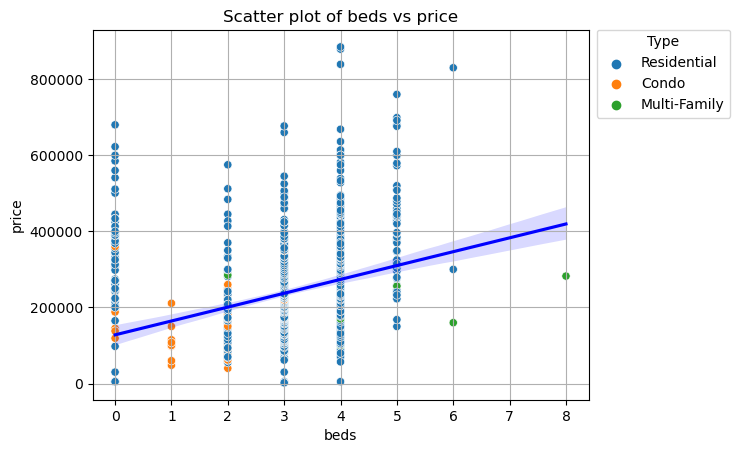

In [18]:
# Scatter plot of beds vs price
draw_scatter_plot(df, 'beds', 'price')

The price increases as the number of beds increase.

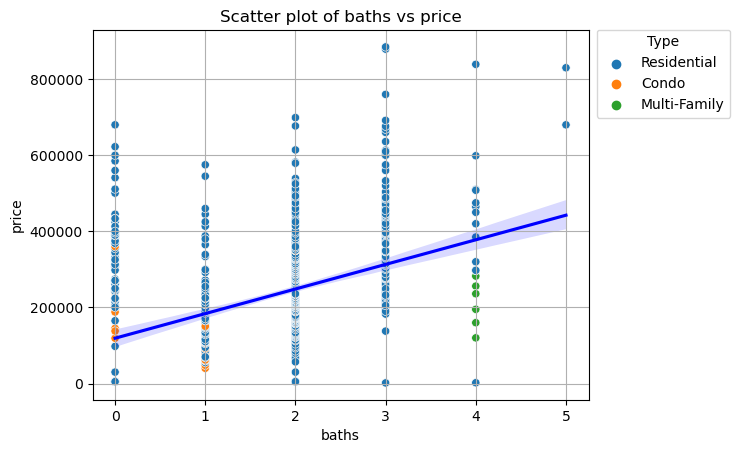

In [19]:
# Scatter plot of baths vs price
draw_scatter_plot(df, 'baths', 'price')

The price increases as the number of baths increase.

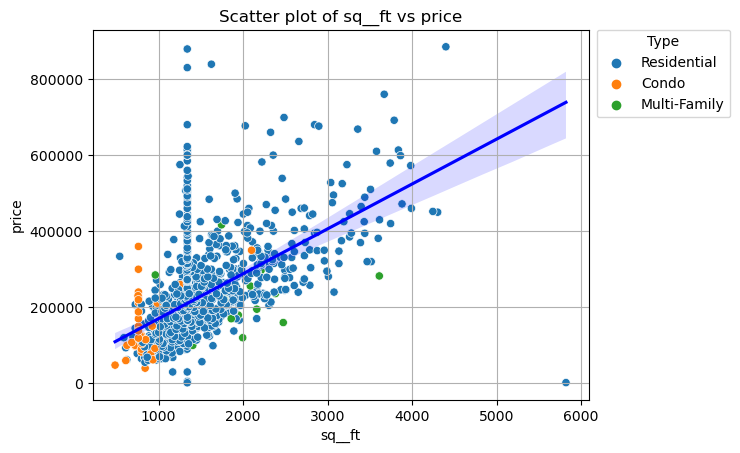

In [20]:
# Scatter plot of sq__ft vs price
draw_scatter_plot(df, 'sq__ft', 'price')

The price increases as the square foot size increase.

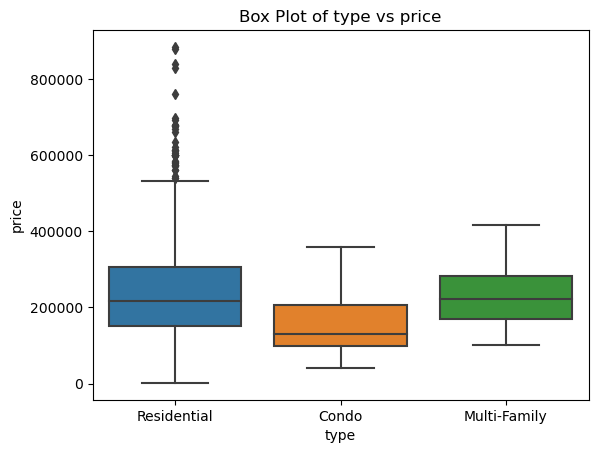

In [21]:
# Boxplot of categorical variable
sns.boxplot(x="type", y="price", data=df)

# Add labels and a title
plt.xlabel("type")
plt.ylabel("price")
plt.title("Box Plot of type vs price")

# Show the plot
plt.show()

There are data points within the "Residential" category that significantly deviate from the typical range or distribution of prices for residential properties.

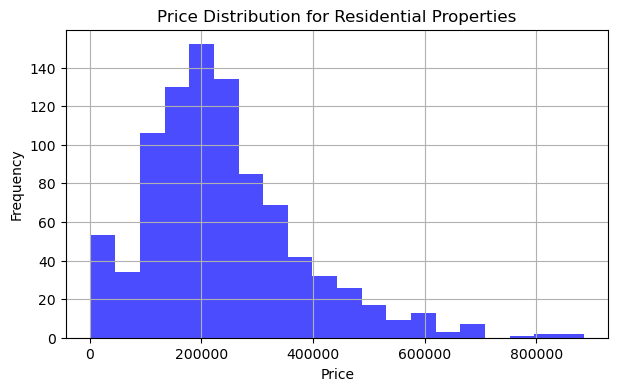

In [22]:
# Plot to further explore the outlier within "Residential"
# Filter the dataset to include only "Residential" properties
residential_data = df[df['type'] == 'Residential']

# Extract the price data for residential properties
residential_prices = residential_data['price']

# Create a histogram to visualize the price distribution
plt.figure(figsize=(7, 4))
plt.hist(residential_prices, bins=20, color='blue', alpha=0.7)
plt.title('Price Distribution for Residential Properties')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

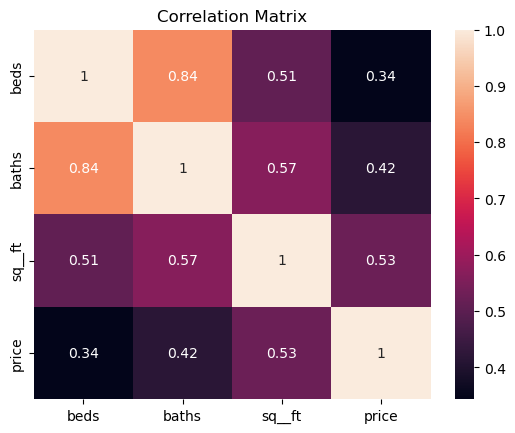

In [23]:
# Correlation matrix
# Define the columns to exclude
excluded_columns = ['latitude', 'longitude', 'day'] 

# Drop the 'latitude' and 'longitude' from the filtered data
filtered_data = df.drop(columns=excluded_columns)

# Calculate the correlation matrix
correlation_matrix = filtered_data.corr(numeric_only=True)

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.title(f'Correlation Matrix')

# Show the plot
plt.show()

ANSWER - Best predictor? Why? Reason?

Square footage (sq__ft) is the best predictor because it impacts all types of properties and also displays the highest correlation with price.

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [24]:
# Import function from module
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [25]:
# ANSWER
# Assign predictor(X) and target(y) variables
X = df['sq__ft'].values.reshape(-1,1) # Converts to np array, then into a 2-d array with single column
y = df['price']

# Fit the model
linreg = LinearRegression()
linreg.fit(X, y)

print(linreg.coef_, linreg.intercept_)

[117.88919572] 52498.15046064736


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [26]:
# ANSWER
# R_square calculation
linreg.score(X, y)

0.276012924314738

### 3. Splitting Data

In [27]:
# Import function from module
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [28]:
# ANSWER
# Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [29]:
# ANSWER
# About training data (X_train and y_train)
print('X_train is a %s' % type(X_train))
print('X_train has %d rows' % X_train.shape[0])
print('')
print('Sample of X_train %s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows' % y_train.shape)
print('')
print('Sample of y_train %s' % ('_'*50))
print(y_train[:10])

X_train is a <class 'numpy.ndarray'>
X_train has 787 rows

Sample of X_train __________________________________________________
[[1882.       ]
 [1443.       ]
 [1624.       ]
 [1269.       ]
 [1939.       ]
 [1255.       ]
 [1262.       ]
 [ 948.       ]
 [1338.6259542]
 [1116.       ]]

y_train is a <class 'pandas.core.series.Series'>
y_train has 787 rows

Sample of y_train __________________________________________________
963    219000
763    280000
334    839000
890    122000
529    423000
468    260000
979    230000
231    211500
568      4897
33     138750
Name: price, dtype: int64


In [30]:
# ANSWER
# About testing data (X_test and y_test)
print('X_test is a %s' % type(X_test))
print('X_test has %d rows' % X_test.shape[0])
print('')
print('Sample of X_test %s' % ('_'*50))
print(X_test[:10])

print('')
print('y_test is a %s' % type(y_test))
print('y_test has %d rows' % y_test.shape)
print('')
print('Sample of y_test %s' % ('_'*50))
print(y_test[:10])

X_test is a <class 'numpy.ndarray'>
X_test has 197 rows

Sample of X_test __________________________________________________
[[ 906.       ]
 [2382.       ]
 [1962.       ]
 [1739.       ]
 [1527.       ]
 [1338.6259542]
 [1338.6259542]
 [1900.       ]
 [1338.6259542]
 [1338.6259542]]

y_test is a <class 'pandas.core.series.Series'>
y_test has 197 rows

Sample of y_test __________________________________________________
613     77000
451    236000
731    240971
436    221000
275    293993
582      4897
707    215000
299    361745
718    222500
494    307000
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [31]:
# ANSWER
# Fit the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(f"beta_0 = {linreg.intercept_}, beta_1= {linreg.coef_}")

beta_0 = 47169.474444758205, beta_1= [122.64457411]


In [32]:
# ANSWER
# R_square calculation
r_square = linreg.score(X_test, y_test)
print(f"R_square = {r_square}")

R_square = 0.30391568335645536


The overall R-squared value is low. This may be due to the limited amount of data used for the analysis.

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [33]:
# ANSWER
# Print beta_0 and beta_1
print(f"beta_0 = {linreg.intercept_}, beta_1= {linreg.coef_}")

beta_0 = 47169.474444758205, beta_1= [122.64457411]


In [34]:
# ANSWER
# Using the formula: y = beta_1 * X + beta_0
beta_0 = linreg.intercept_
beta_1 = linreg.coef_
X = 1204

ypred = beta_1 * X + beta_0
print('Predicted house price =', ypred[0])

Predicted house price = 194833.54167320207


In [35]:
# ANSWER
# Using the predict function of sklearn's linear model
X = [[1204]]
ypred = linreg.predict(X)
print('Predicted house price: ', ypred[0])

Predicted house price:  194833.54167320207


#### Find the error

In [36]:
# Predict price of X_test
y_preds = linreg.predict(X_test)

# Display values
print(y_preds[:10])

[158285.45858842 339308.84997479 287798.12884858 260448.38882205
 234447.73911073 211344.68449003 211344.68449003 280194.16525376
 211344.68449003 211344.68449003]


In [37]:
print(X_test[:10])

[[ 906.       ]
 [2382.       ]
 [1962.       ]
 [1739.       ]
 [1527.       ]
 [1338.6259542]
 [1338.6259542]
 [1900.       ]
 [1338.6259542]
 [1338.6259542]]


In [38]:
# Import mean squared error function
from sklearn.metrics import mean_squared_error

# Find mean squared error
mean_squared_error(y_test, y_preds, squared=True)

14395583358.75763



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



